# Analize results

In [1]:
from supportFiles.myFunc import loadModel, getDSName, setTarget, loadDataset, getFeatureList
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

'AB-TRAP_CIC'

In [17]:
%pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2

## Feature Importance

In [2]:
#Datasets available are :
# {0: 'AB-TRAP', 1: 'NB15', 2: 'CIC-IDS', 3: 'ToN-IoT', 4: 'BoT-IoT'}
trainerDS = 0
testerDS = 1
modelName = "DT"
# Set names
trainerDSName = getDSName(trainerDS,1,True,True)
testerDSName = getDSName(testerDS,1,True,True)

models, prep, table, algo = loadModel(trainerDSName)
cols = getFeatureList(0)[0:67]
#X, y = setTarget(loadDataset(testerDS, 96, 1), testerDS, True, True, trainerDS)

loading models from SCAN_AB-TRAP_CIC
Models fetched: ['SCAN_AB-TRAP_CIC_DT.joblib', 'SCAN_AB-TRAP_CIC_LR.joblib', 'SCAN_AB-TRAP_CIC_MLP.joblib', 'SCAN_AB-TRAP_CIC_NB.joblib', 'SCAN_AB-TRAP_CIC_SVM.joblib', 'SCAN_AB-TRAP_CIC_XGB.joblib']
DT's index of best performance: 5
LR's index of best performance: 0
MLP's index of best performance: 0
NB's index of best performance: 0
SVM's index of best performance: 0
XGB's index of best performance: 0
DT


### DT

Get feature importance directly from model

In [3]:
clf = models['DT'].best_estimator_
relevantes = clf.feature_importances_

reading file: 


Process feature importance for plotting

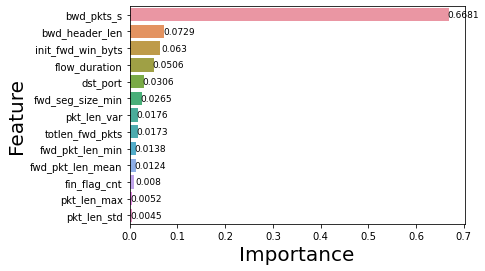

In [4]:
import seaborn as sns
import os

fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.004]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    g.text(row.feature_importance+0.03, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, modelName)
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### LR

Get feature importance directly from model coefficient's absolute values and normalize

In [ ]:
relevantes = list(map(abs, models["LR"].best_estimator_.coef_))[0]
relevantes = relevantes/max(relevantes)

Process feature importance for plotting

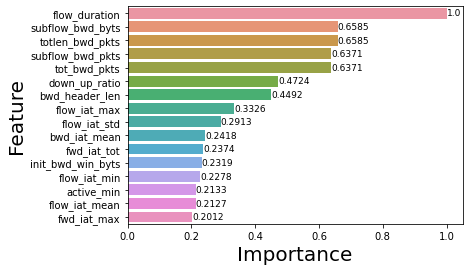

In [44]:
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.2]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "LR")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### MLP

Get feature importance directly from model coefficient's by adding absolute values for every path weight

Weight is calculated by multiplying path's coefficients

In [ ]:
models["MLP"].best_estimator_.coefs_[1]
hocuspocus = lambda a,b: [[r*q for r,q in zip(p,b)] for p in a]
c = hocuspocus(models["MLP"].best_estimator_.coefs_[0],models["MLP"].best_estimator_.coefs_[1])
relevantes = []
for entry in c:
    relevantes.append(sum(list(map(abs, entry))[0]) )
    
relevantes = relevantes/max(relevantes)

Process feature importance for plotting

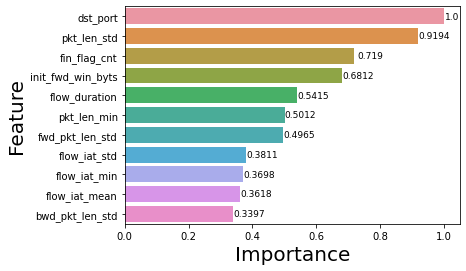

In [83]:
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.3]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "MLP")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### SVM

Get feature importance directly from model coefficient's absolute values and normalize

In [ ]:
relevantes = list(map(abs, models["SVM"].best_estimator_.coef_[0]))
relevantes = relevantes/max(relevantes)

Process feature importance for plotting

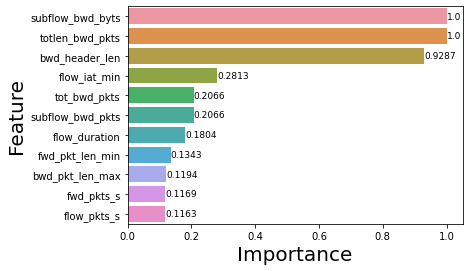

In [95]:
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.1]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "SVM")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### SVM by prediction

Get feature importance directly from model's predictions normalized absolute values

Predictions are made with each feature set to one while others are set to zero

In [ ]:
relevantes = list(map(abs, models["SVM"].best_estimator_.decision_function(np.identity(67))))
relevantes = relevantes/max(relevantes)

Process feature importance for plotting

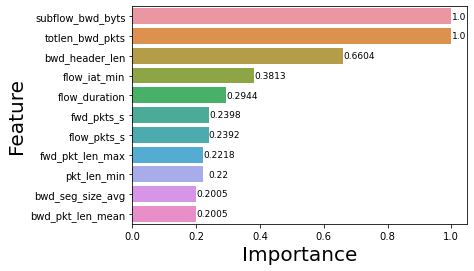

In [106]:
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.2]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "SVM")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### XGB

Get feature importance directly from model

In [ ]:
relevantes = list(map(abs, models["XGB"].best_estimator_.feature_importances_))
relevantes = relevantes/max(relevantes)

Process feature importance for plotting

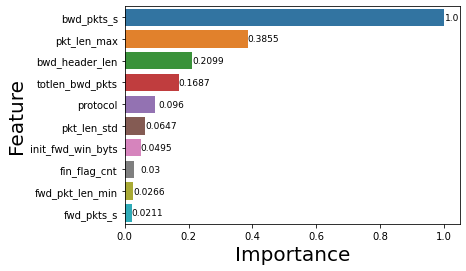

In [115]:
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.02]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "SVM")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

## Build LaTeX tables

In [1]:
import pandas as pd
import numpy as np
import os
from supportFiles.myFunc import saveTable

files = [s for s in os.listdir("./dissertation/") if ((".csv" in s) and ("fscore_" in s))]
print(files)
for file in files:
    tableName = file.replace(".csv","")
    table = pd.read_csv("./dissertation/"+file, sep=',')
    caption = "Feature importance {0}".format(tableName)
    label = tableName
    saveTable(table, tableName, caption, label)

['fscore_AB-TRAP_CIC.csv', 'fscore_BoT-IoT_CIC.csv', 'fscore_NB15_CIC.csv', 'fscore_SCAN_AB-TRAP_CIC.csv', 'fscore_SCAN_BoT-IoT_CIC.csv', 'fscore_SCAN_CIC-IDS_CIC.csv', 'fscore_SCAN_NB15_CIC.csv', 'fscore_SCAN_ToN-IoT_CIC.csv', 'fscore_ToN-IoT_CIC.csv']
